<a href="https://colab.research.google.com/github/dantrainor9/Cervical_cancer_risk_factors/blob/main/Project_2_Part_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This iteration is exploring the Hinselmann test. This test, medically, contains areas of concern for using this as a determinant for diagnosing cancer. Firstly, the tissue that is being tested must be anesthetized in order to be examined. This itself is a potential confound, as well as even minor leakage of blood. Generally, this is used as a way to provide visual examination in support of abnormal citology results from a pap smear, as it can help doctors distinguish between malignant carcinomas and benign growths.

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3279084/

In [80]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

In [82]:
path = '/content/drive/MyDrive/CodingDojo Data Science Bootcamp/07 Week 7 Logistic Regression and Regularization/risk_factors_cervical_cancer.csv'
df = pd.read_csv(path)
df.head() 
#checking the first 5 rows in the dataset to make sure it loaded correctly

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [83]:
df.shape

(858, 36)

Multiple targets are present in the above dataset gathered from the UCI machine learning repository, as multiple diagnostic tools were used. However, as 'Biopsy' is the most common way of diagnosing cancer in the United States, I will be using that as my primary target after comparing the performance of the different diagnostic tests. 
This is a classification problem with 32 features.
There are 858 rows of data. 
I anticipate problems with missing data, as participants were not required to answer every question due to the sensitive nature of the survey.

In [84]:
df = df.replace('?', np.nan) 
#replacing question marks in the dataset with np.nan so I can impute using SimpleImputer

In [85]:
df.isna().sum() 
#checking for null values

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [86]:
X = df[['Age', 
        'Number of sexual partners', 
        'First sexual intercourse', 
        'Num of pregnancies', 
        'Smokes', 
        'Smokes (years)', 
        'Smokes (packs/year)', 
        'Hormonal Contraceptives', 
        'Hormonal Contraceptives (years)', 
        'IUD', 
        'IUD (years)', 
        'STDs', 
        'STDs (number)', 
        'STDs:condylomatosis', 
        'STDs:vaginal condylomatosis', 
        'STDs:vulvo-perineal condylomatosis', 
        'STDs:syphilis', 
        'STDs:pelvic inflammatory disease', 
        'STDs:genital herpes', 
        'STDs:molluscum contagiosum', 
        'STDs:HIV',  
        'STDs:HPV', 
        'STDs: Number of diagnosis', 
        'Dx:Cancer', 
        'Dx:CIN', 
        'Dx:HPV', 
        'Dx']]
y = df['Hinselmann']
#excluding 2 columns as features, time since first and last diagnosis of STDs
#excluding 3 columns as all participants answered the same, STDs: cervical condylomatosis, hepatitis B, and AIDS

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [88]:
X_train

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
434,20,3.0,17.0,2.0,0.0,0.0,0.0,1.0,0.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
204,21,1.0,20.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
590,17,2.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
584,30,2.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
838,35,3.0,18.0,3.0,0.0,0.0,0.0,1.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,34,NaN,NaN,3.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
106,30,4.0,16.0,2.0,0.0,0.0,0.0,1.0,13.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
270,21,1.0,17.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
435,17,2.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [89]:
mean_impute = SimpleImputer(missing_values=np.nan, strategy='mean')
mode_impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#building a column transformer for imputing

In [90]:
mode_list = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'Number of sexual partners', 'Num of pregnancies', 'First sexual intercourse',
             'STDs', 'STDs:condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 
             'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',  'STDs:HPV']
#splitting into different lists based on imputation method

In [91]:
mean_list = ['Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis']

In [92]:
mode_tuple = (mode_impute, mode_list)
mean_tuple = (mean_impute, mean_list)

In [93]:
coltrans = make_column_transformer(mode_tuple, mean_tuple, remainder='passthrough')
#instantiating column transformer

In [94]:
coltrans.fit(X_train)
X_train_imp = coltrans.transform(X_train)
X_test_imp = coltrans.transform(X_test)
#fitting and transforming data

In [95]:
X_train_imp

array([['0.0', '1.0', '0.0', ..., 0, 0, 0],
       ['0.0', '0.0', '0.0', ..., 0, 0, 0],
       ['0.0', '0.0', '0.0', ..., 0, 0, 0],
       ...,
       ['0.0', '1.0', '0.0', ..., 0, 0, 0],
       ['0.0', '0.0', '0.0', ..., 0, 0, 0],
       ['0.0', '1.0', '0.0', ..., 0, 0, 0]], dtype=object)

In [96]:
col_names = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'Number of sexual partners', 'Num of pregnancies', 'First sexual intercourse',
             'STDs', 'STDs:condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 
             'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',  'STDs:HPV', 
             'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis', 'Age',
             'Dx:Cancer', 
             'Dx:CIN', 
             'Dx:HPV',
             'Dx']
#column transformer moved around my columns so they are listed here in the revised order for column name assignment in the next step

In [97]:
X_train_eda = pd.DataFrame(X_train_imp, columns=col_names)
X_test_eda = pd.DataFrame(X_test_imp, columns=col_names)
#reconverting from array to dataframe

In [98]:
X_train_eda.value_counts()
#verifying all my columns are in the right place

Smokes  Hormonal Contraceptives  IUD  Number of sexual partners  Num of pregnancies  First sexual intercourse  STDs  STDs:condylomatosis  STDs:vaginal condylomatosis  STDs:vulvo-perineal condylomatosis  STDs:syphilis  STDs:pelvic inflammatory disease  STDs:genital herpes  STDs:molluscum contagiosum  STDs:HIV  STDs:HPV  Smokes (years)  Smokes (packs/year)  Hormonal Contraceptives (years)  IUD (years)  STDs (number)  STDs: Number of diagnosis  Age  Dx:Cancer  Dx:CIN  Dx:HPV  Dx
0.0     0.0                      0.0  1.0                        1.0                 14.0                      0.0   0.0                  0.0                          0.0                                 0.0            0.0                               0.0                  0.0                         0.0       0.0       0.0             0.0                  0.000000                         0.00000      0.000000       0.0                        15   0          0       0       0     3
                                 

In [99]:
X_train_eda.info()
#verifying successful imputations of missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Smokes                              643 non-null    object
 1   Hormonal Contraceptives             643 non-null    object
 2   IUD                                 643 non-null    object
 3   Number of sexual partners           643 non-null    object
 4   Num of pregnancies                  643 non-null    object
 5   First sexual intercourse            643 non-null    object
 6   STDs                                643 non-null    object
 7   STDs:condylomatosis                 643 non-null    object
 8   STDs:vaginal condylomatosis         643 non-null    object
 9   STDs:vulvo-perineal condylomatosis  643 non-null    object
 10  STDs:syphilis                       643 non-null    object
 11  STDs:pelvic inflammatory disease    643 non-null    object

In [100]:
X_train_eda = X_train_eda.astype('float')
#messy data types, fixing that

In [101]:
X_train_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Smokes                              643 non-null    float64
 1   Hormonal Contraceptives             643 non-null    float64
 2   IUD                                 643 non-null    float64
 3   Number of sexual partners           643 non-null    float64
 4   Num of pregnancies                  643 non-null    float64
 5   First sexual intercourse            643 non-null    float64
 6   STDs                                643 non-null    float64
 7   STDs:condylomatosis                 643 non-null    float64
 8   STDs:vaginal condylomatosis         643 non-null    float64
 9   STDs:vulvo-perineal condylomatosis  643 non-null    float64
 10  STDs:syphilis                       643 non-null    float64
 11  STDs:pelvic inflammatory disease    643 non-n

In [102]:
X_test_eda = X_test_eda.astype('float')
#fixing data types in X_test as well

In [103]:
X_test_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Smokes                              215 non-null    float64
 1   Hormonal Contraceptives             215 non-null    float64
 2   IUD                                 215 non-null    float64
 3   Number of sexual partners           215 non-null    float64
 4   Num of pregnancies                  215 non-null    float64
 5   First sexual intercourse            215 non-null    float64
 6   STDs                                215 non-null    float64
 7   STDs:condylomatosis                 215 non-null    float64
 8   STDs:vaginal condylomatosis         215 non-null    float64
 9   STDs:vulvo-perineal condylomatosis  215 non-null    float64
 10  STDs:syphilis                       215 non-null    float64
 11  STDs:pelvic inflammatory disease    215 non-n

Repeating data visualization for all variables to ensure that training data remains the same across different iterations examining different targets

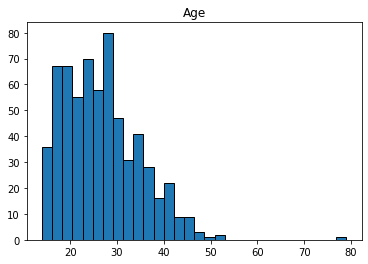

In [104]:
plt.hist(X_train_eda['Age'], bins=30, edgecolor='k')
plt.title('Age');
#looks like an outlier here, at least one much older participant

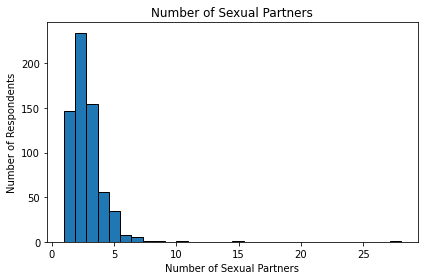

In [105]:
plt.hist(X_train_eda['Number of sexual partners'], bins=30, edgecolor='k')
plt.title('Number of Sexual Partners')
plt.xlabel('Number of Sexual Partners')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.savefig('NumberofSexualPartners.png', dpi = 300);
#some outliers here as well

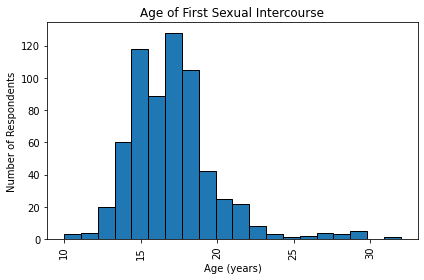

In [106]:
plt.hist(X_train_eda['First sexual intercourse'], bins=20, edgecolor='k')
plt.title('Age of First Sexual Intercourse')
plt.xlabel('Age (years)')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('AgeofFirstSexualIntercourse.png', dpi = 300);
#fairly normal with a bit of a right skew

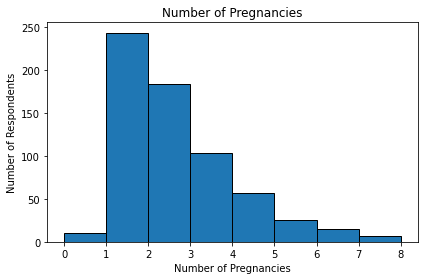

In [107]:
plt.hist(X_train_eda['Num of pregnancies'], bins=8, edgecolor='k')
plt.title('Number of Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.savefig('NumberofPregnancies.png', dpi = 300);
#right skew here

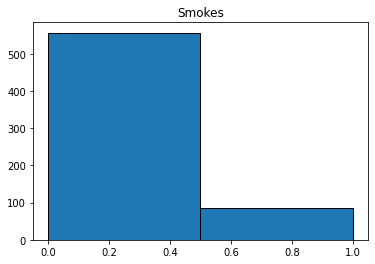

In [108]:
plt.hist(X_train_eda['Smokes'], bins=2, edgecolor='k')
plt.title('Smokes');

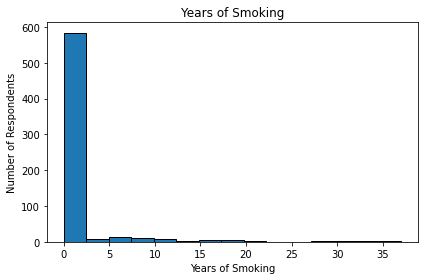

In [109]:
plt.hist(X_train_eda['Smokes (years)'], bins=15, edgecolor='k')
plt.title('Years of Smoking')
plt.xlabel('Years of Smoking')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.savefig('YearsofSmoking.png', dpi=300);
#right skew, though most of these probably count as outliers as most participants were non-smokers

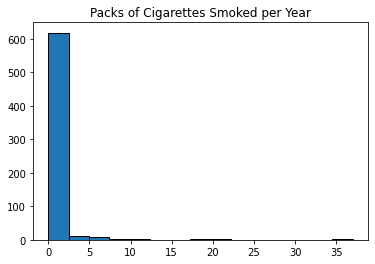

In [110]:
plt.hist(X_train_eda['Smokes (packs/year)'], bins=15, edgecolor='k')
plt.title('Packs of Cigarettes Smoked per Year');
#similar skew to the graph above

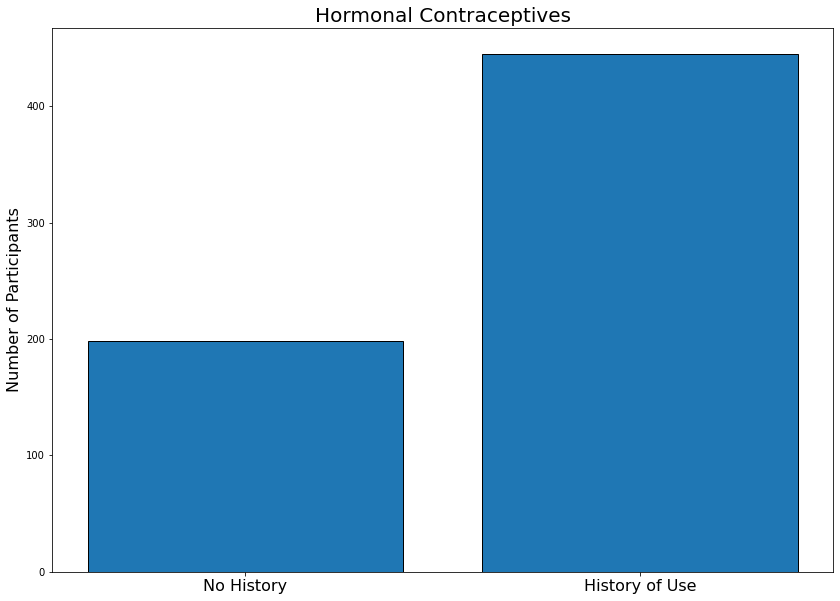

In [111]:
z = X_train_eda['Hormonal Contraceptives'].value_counts()

a = list(z.index)
b = list(z)

plt.figure(figsize=(14,10))
plt.bar(a, b, edgecolor='k')
plt.title('Hormonal Contraceptives', fontsize=20)
plt.xticks(ticks=[0,1], labels=['No History', 'History of Use'], fontsize=16),
plt.ylabel('Number of Participants', fontsize=16);
#more common for our participants to have taken hormonal contraceptives than not

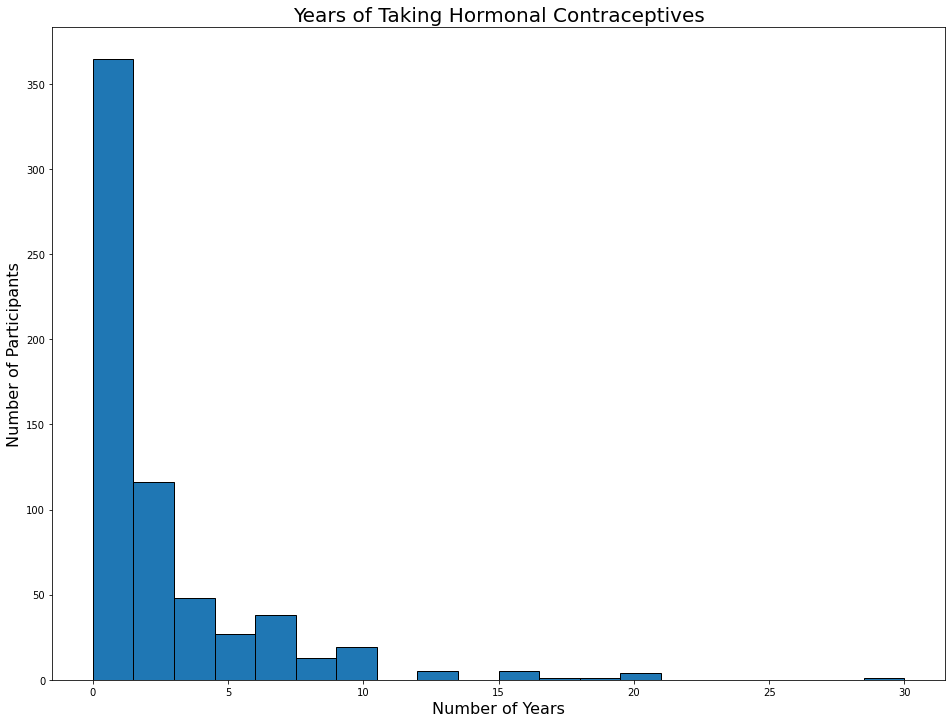

In [112]:
plt.figure(figsize=(16,12))
plt.hist(X_train_eda['Hormonal Contraceptives (years)'], bins=20, edgecolor='k')
plt.title('Years of Taking Hormonal Contraceptives', fontsize=20),
plt.xlabel('Number of Years', fontsize=16),
plt.ylabel('Number of Participants', fontsize=16);
#right skew with some outliers

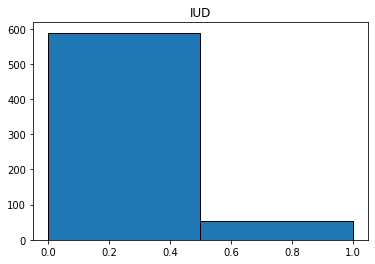

In [113]:
plt.hist(X_train_eda['IUD'], bins=2, edgecolor='k')
plt.title('IUD');
#IUD is much less common than hormonal contraceptives in our dataset

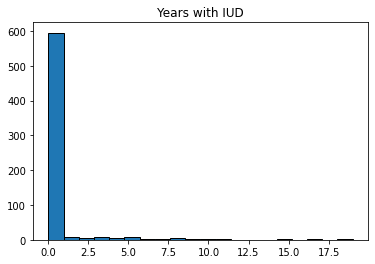

In [114]:
plt.hist(X_train_eda['IUD (years)'], bins=20, edgecolor='k')
plt.title('Years with IUD');
#with so few IUD users, most on the tail of this skew are likely outliers

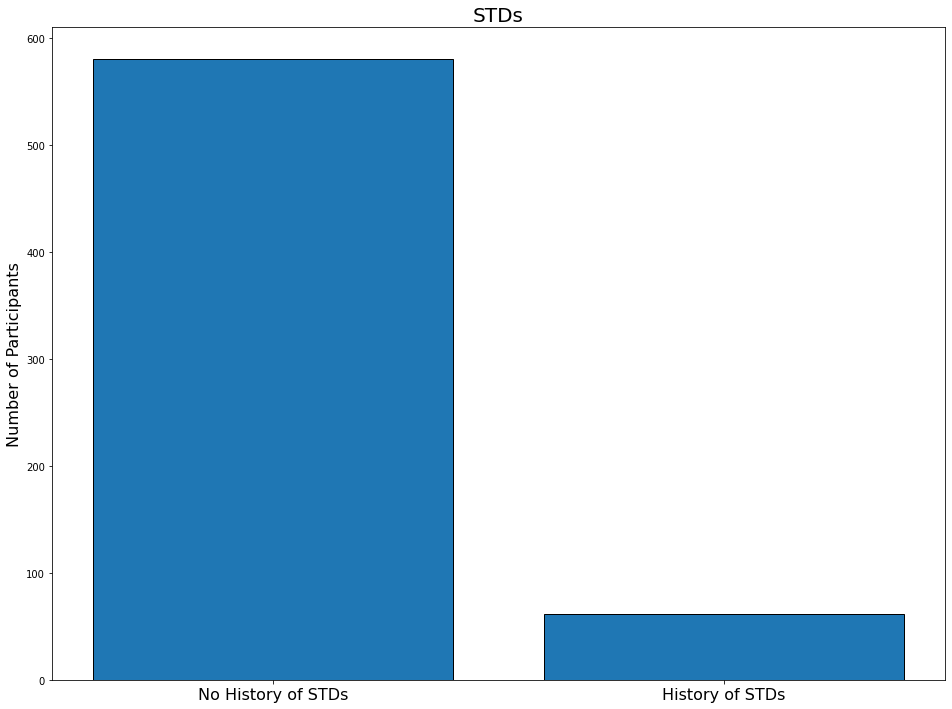

In [115]:
z = X_train_eda['STDs'].value_counts()

a = list(z.index)
b = list(z)

plt.figure(figsize=(16,12))
plt.bar(a, b, edgecolor='k')
plt.title('STDs', fontsize=20)
plt.xticks(ticks=[0,1], labels=['No History of STDs', 'History of STDs'], fontsize=16)
plt.ylabel('Number of Participants', fontsize=16);
#STDs are uncommon it seems, or at least not commonly admitted to

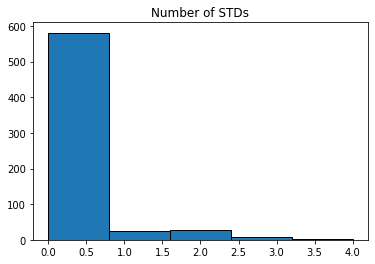

In [116]:
plt.hist(X_train_eda['STDs (number)'], bins=5, edgecolor='k')
plt.title('Number of STDs');
#also more common to disclose fewer than 3

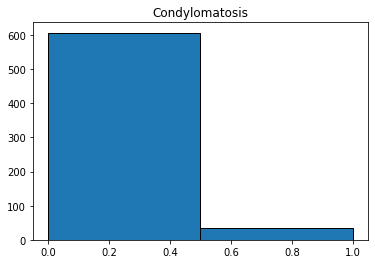

In [117]:
plt.hist(X_train_eda['STDs:condylomatosis'], bins=2, edgecolor='k')
plt.title('Condylomatosis');

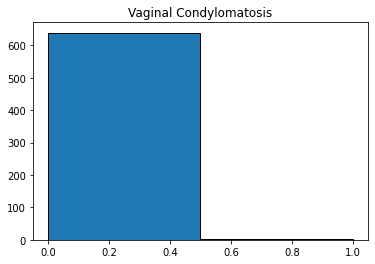

In [118]:
plt.hist(X_train_eda['STDs:vaginal condylomatosis'], bins=2, edgecolor='k')
plt.title('Vaginal Condylomatosis');

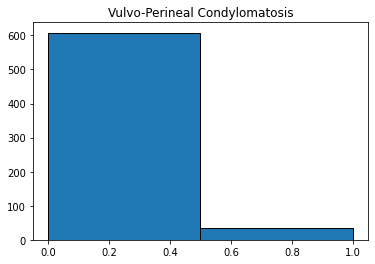

In [119]:
plt.hist(X_train_eda['STDs:vulvo-perineal condylomatosis'], bins=2, edgecolor='k')
plt.title('Vulvo-Perineal Condylomatosis');

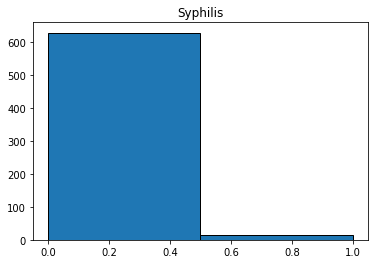

In [120]:
plt.hist(X_train_eda['STDs:syphilis'], bins=2, edgecolor='k')
plt.title('Syphilis');

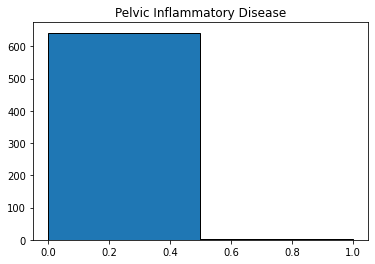

In [121]:
plt.hist(X_train_eda['STDs:pelvic inflammatory disease'], bins=2, edgecolor='k')
plt.title('Pelvic Inflammatory Disease');

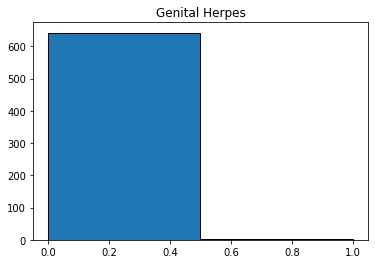

In [122]:
plt.hist(X_train_eda['STDs:genital herpes'], bins=2, edgecolor='k')
plt.title('Genital Herpes');

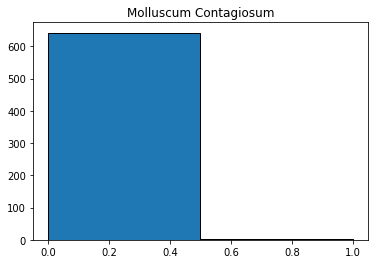

In [123]:
plt.hist(X_train_eda['STDs:molluscum contagiosum'], bins=2, edgecolor='k')
plt.title('Molluscum Contagiosum');

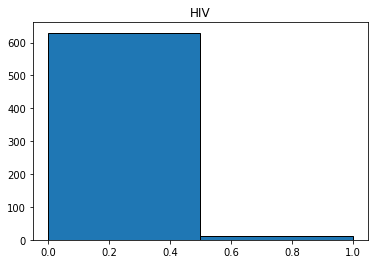

In [124]:
plt.hist(X_train_eda['STDs:HIV'], bins=2, edgecolor='k')
plt.title('HIV');
#still some with HIV, however, this does not necessarily confound their data

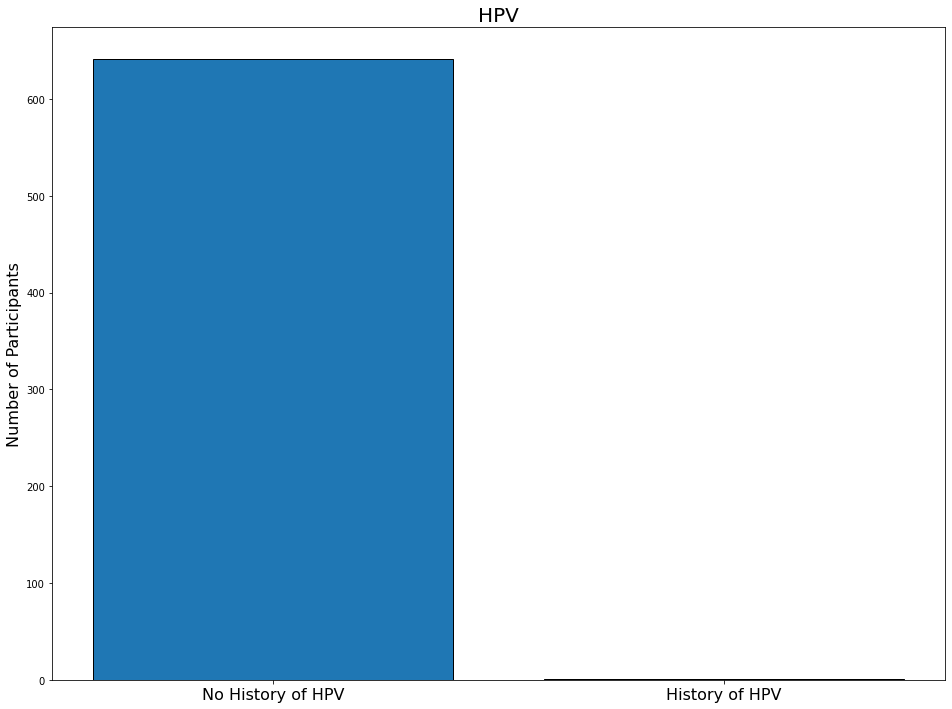

In [125]:
z = X_train_eda['STDs:HPV'].value_counts()

a = list(z.index)
b = list(z)

plt.figure(figsize=(16,12))
plt.bar(a, b, edgecolor='k')
plt.title('HPV', fontsize=20)
plt.xticks(ticks=[0,1], labels=['No History of HPV', 'History of HPV'], fontsize=16)
plt.ylabel('Number of Participants', fontsize=16);

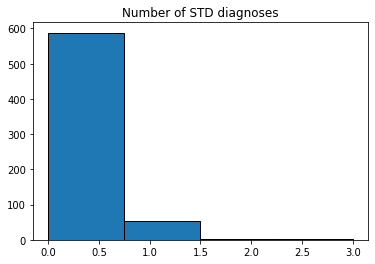

In [126]:
plt.hist(X_train_eda['STDs: Number of diagnosis'], bins=4, edgecolor='k')
plt.title('Number of STD diagnoses');
#looks like anyone who answered more than 1 is an outlier in this column

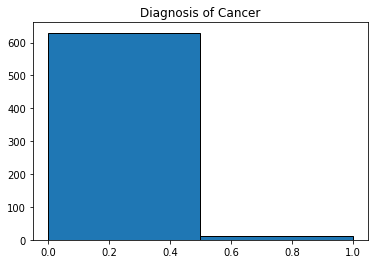

In [127]:
plt.hist(X_train_eda['Dx:Cancer'], bins=2, edgecolor='k')
plt.title('Diagnosis of Cancer');

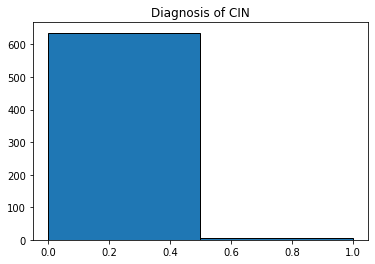

In [128]:
plt.hist(X_train_eda['Dx:CIN'], bins=2, edgecolor='k')
plt.title('Diagnosis of CIN');

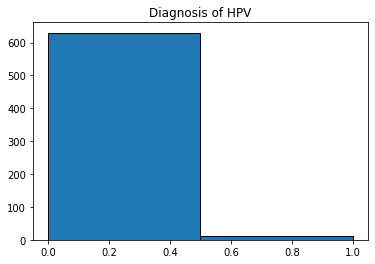

In [129]:
plt.hist(X_train_eda['Dx:HPV'], bins=2, edgecolor='k')
plt.title('Diagnosis of HPV');

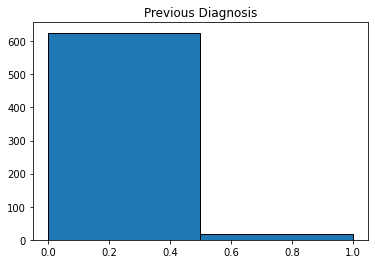

In [130]:
plt.hist(X_train_eda['Dx'], bins=2, edgecolor='k')
plt.title('Previous Diagnosis');

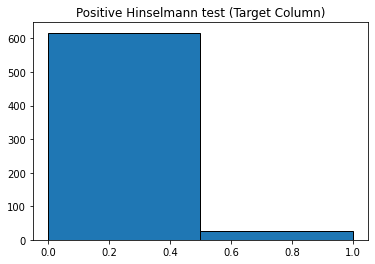

In [131]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.title('Positive Hinselmann test (Target Column)');
#target column

It seems that Hinselmann test may be the most imbalanced target column thus far examined. This may be because the method of diagnosis relies upon visual examination

In [132]:
X_train_eda['Hinselmann'] = y_train
#re-adding the target column for checking correlations

In [133]:
train_corr = X_train_eda.corr()

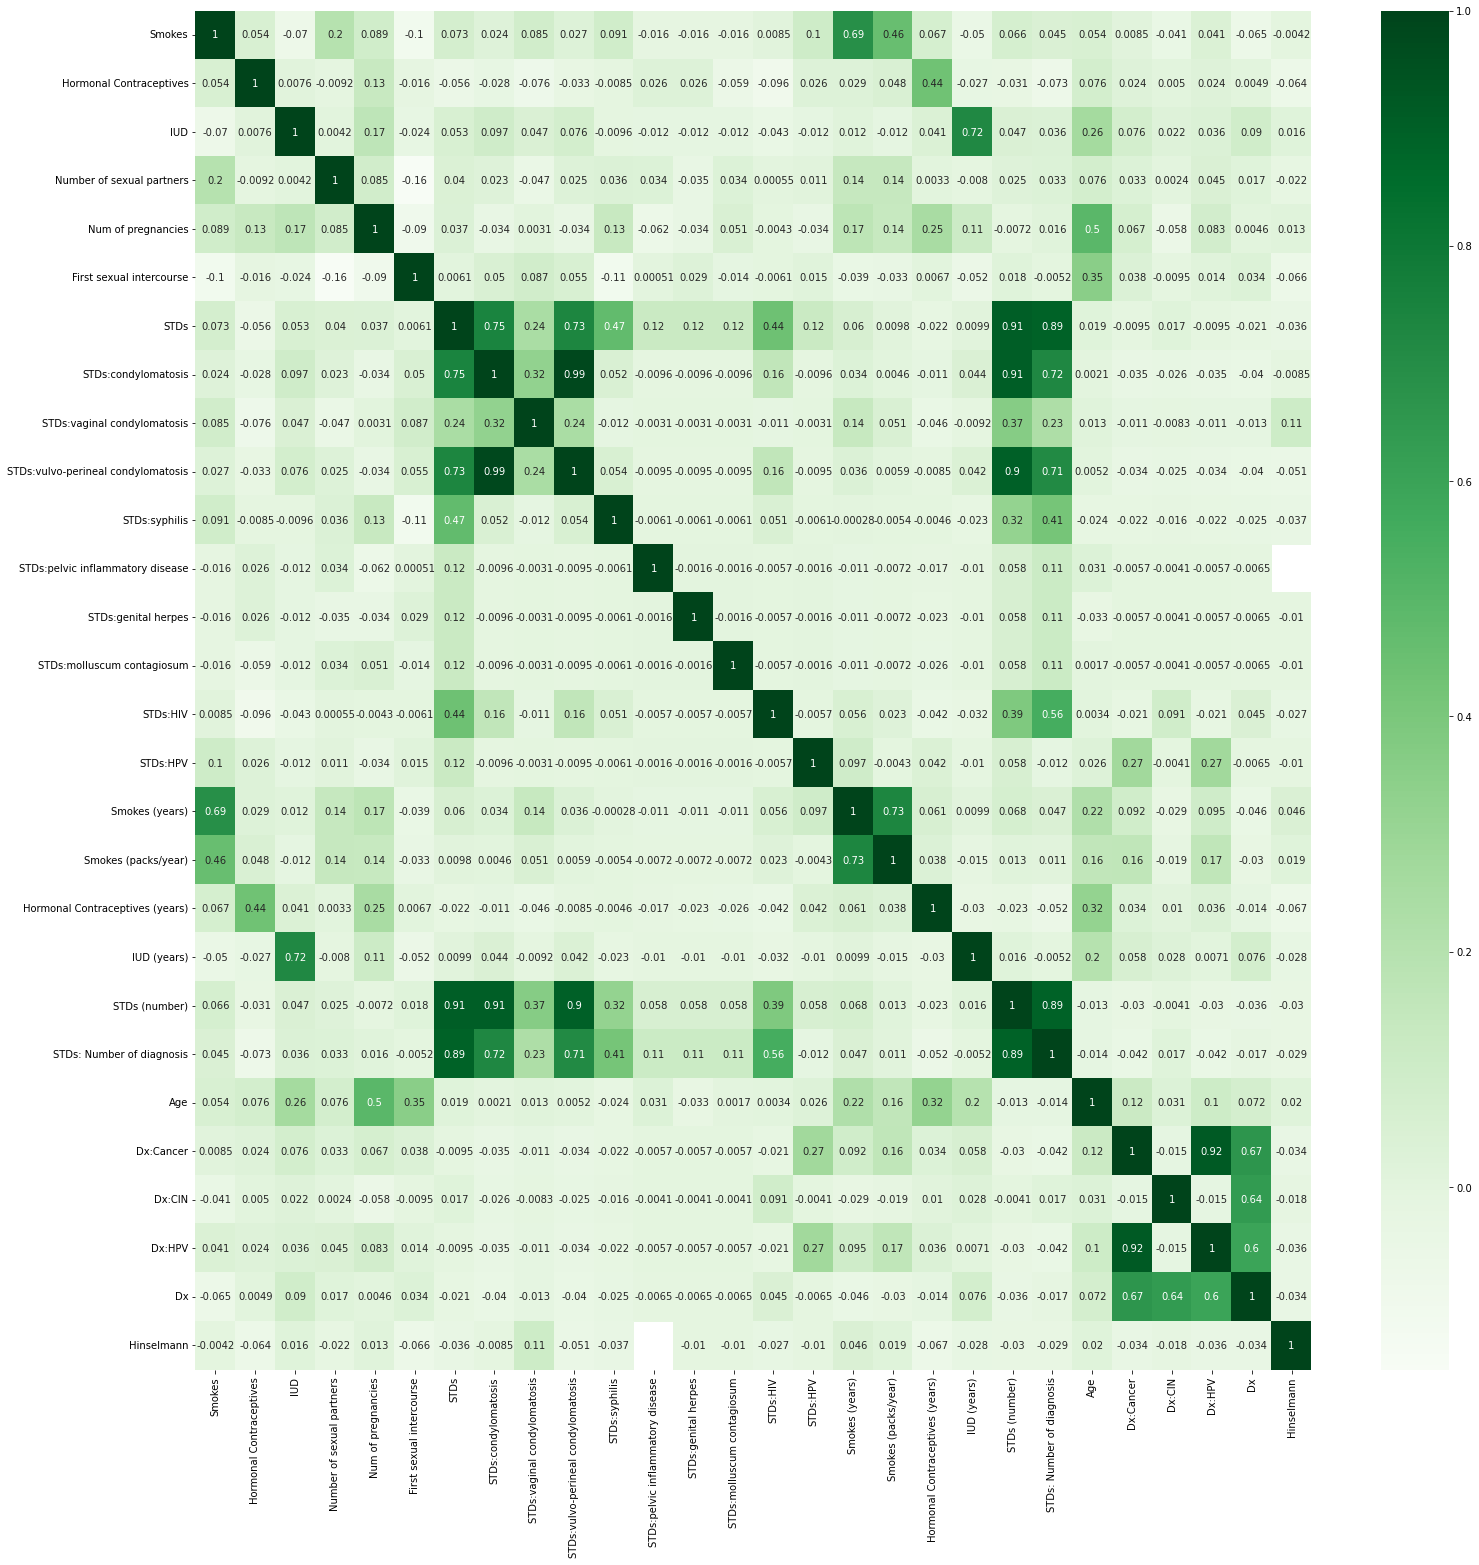

In [134]:
plt.figure(figsize=(25,25))
sns.heatmap(data=train_corr, cmap='Greens', annot=True);

Unfortunately no strong correlations with the Hinselmann column. This is consistent with both of the other diagnostic methods examined so far.

<Figure size 2160x2160 with 0 Axes>

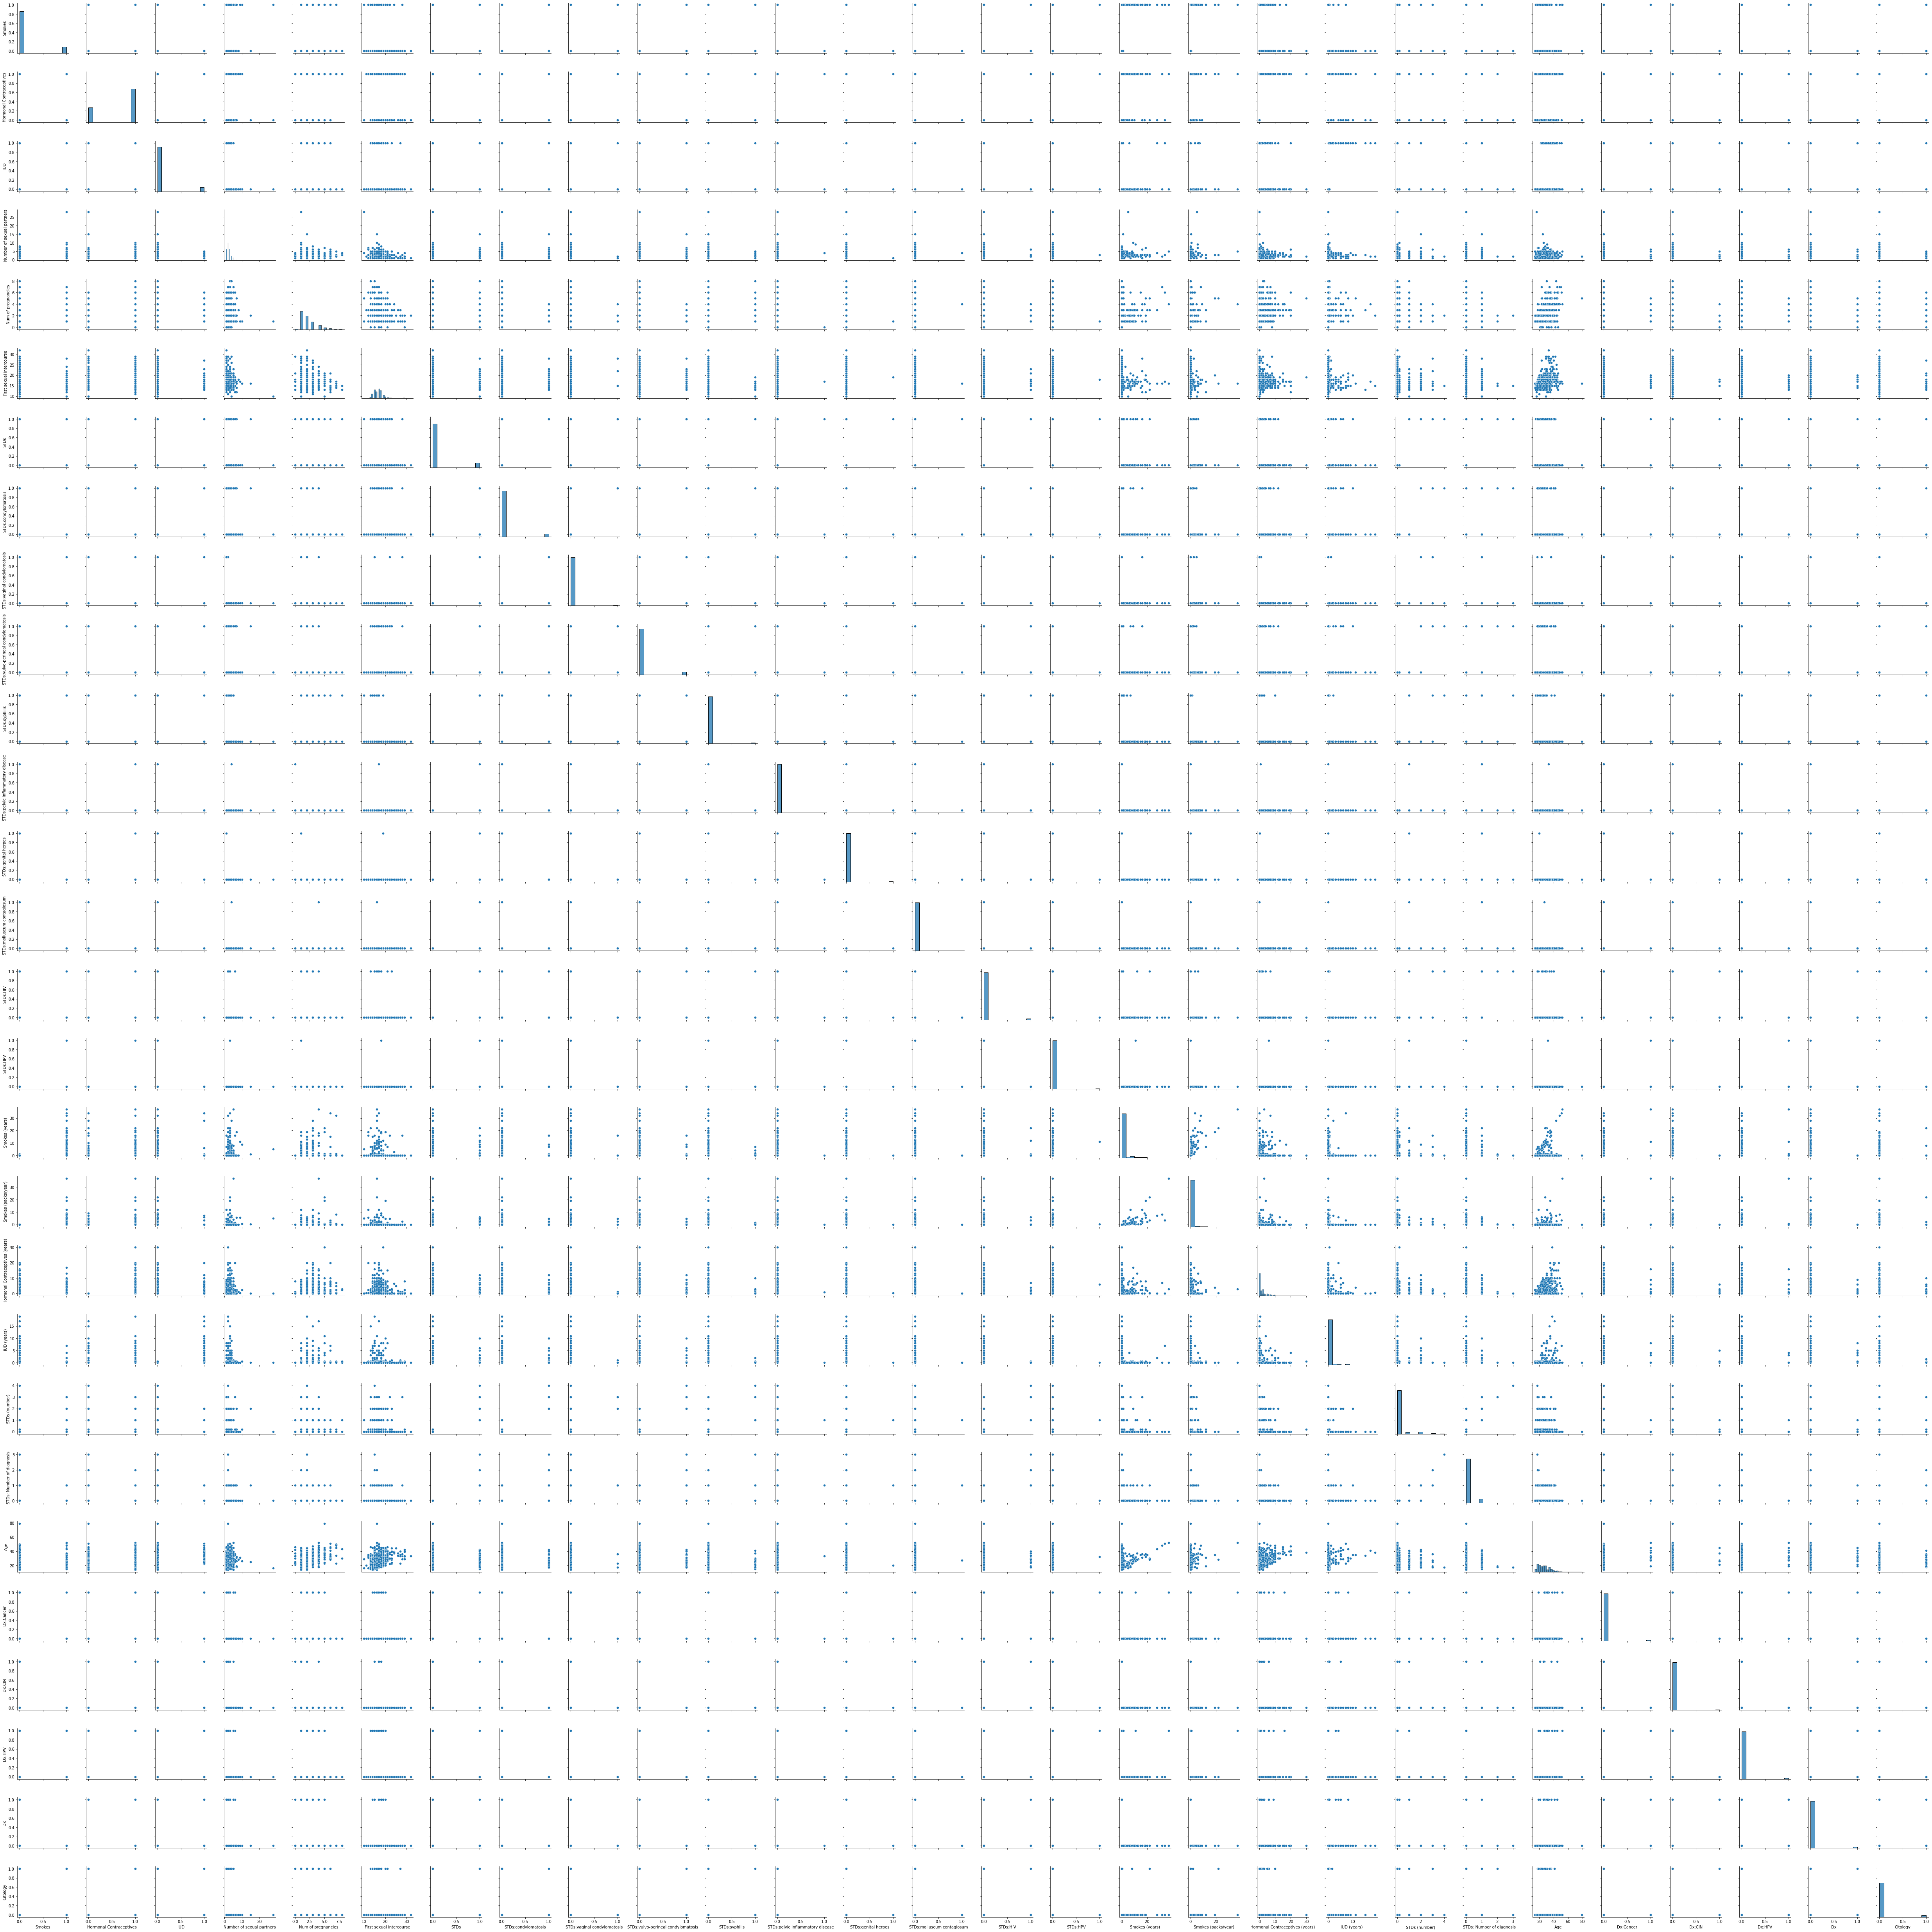

In [ ]:
plt.figure(figsize=(30,30))
sns.pairplot(X_train_eda);

In [ ]:
X_train_eda = X_train_eda.drop(columns=['Hinselmann'])
#re-dropping target column

In [ ]:
scaler = StandardScaler()
#instantiating scaler

In [ ]:
xgb = XGBClassifier()
#instantiating xgb model

In [ ]:
xgb_pipe = make_pipeline(scaler, xgb)

In [ ]:
xgb_pipe.fit(X_train_eda, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier', XGBClassifier())])

In [ ]:
xgb_preds = xgb_pipe.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
print(classification_report(y_test,xgb_preds))
#looks like when testing with Citology, the model still has trouble predicting the positive class
#this reinforces the theory that this is due to imbalances in data

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       208
           1       0.00      0.00      0.00         7

    accuracy                           0.96       215
   macro avg       0.48      0.50      0.49       215
weighted avg       0.94      0.96      0.95       215



In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf_pipe = make_pipeline(scaler,rf)

In [ ]:
rf_pipe.fit(X_train_eda, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
rf_preds = rf_pipe.predict(X_test_eda)

In [ ]:
print(classification_report(y_test,rf_preds))
#random forest seems to have performed better than the gradient boosted model so far
#I'll try one other gradient boosted model

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       208
           1       0.00      0.00      0.00         7

    accuracy                           0.96       215
   macro avg       0.48      0.50      0.49       215
weighted avg       0.94      0.96      0.95       215



So far, Citology seems to be worse for model training overall.

In [ ]:
lgb = LGBMClassifier()

In [ ]:
lgb_pipe = make_pipeline(scaler,lgb)

In [ ]:
lgb_pipe.fit(X_train_eda, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lgbmclassifier', LGBMClassifier())])

In [ ]:
lgb_preds = lgb_pipe.predict(X_test_eda)

In [ ]:
print(classification_report(y_test, lgb_preds))
#so far, no model has been able to predict a positive Citology test
#I'll try a neural network next

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       208
           1       0.00      0.00      0.00         7

    accuracy                           0.95       215
   macro avg       0.48      0.49      0.49       215
weighted avg       0.94      0.95      0.94       215



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
X_train_scaled = scaler.fit_transform(X_train_eda)
X_test_scaled = scaler.transform(X_test_eda)

In [ ]:
model = Sequential()

In [ ]:
input_shape = X_train_scaled.shape[1]

In [ ]:
def plot_history(history, metric=None):
  fig, axes = plt.subplots(2,1, figsize = (5,10))
  axes[0].plot(history.history['loss'], label = "train")
  axes[0].plot(history.history['val_loss'], label='test')
  axes[0].set_title('Loss')
  axes[0].legend()
  if metric:
    axes[1].plot(history.history[metric], label = 'train')
    axes[1].plot(history.history['val_' + metric], label = 'test')
    axes[1].set_title(metric)
    axes[1].legend()

  plt.show()

In [ ]:
model.add(Dense(18, activation='relu', input_dim=input_shape))

model.add(Dense(10, activation='relu', input_dim=input_shape))

model.add(Dense(1, activation='sigmoid'))
estop = EarlyStopping(patience=10)

In [ ]:
model.compile(optimizer='adam', loss='bce', metrics='acc')

In [ ]:
history = model.fit(X_train_scaled, y_train,
                    validation_data = (X_test_scaled, y_test),
                    epochs = 100,
                    callbacks=[estop])

Epoch 1/100
21/21 [==============================] - 1s 10ms/step - loss: 0.5017 - acc: 0.9362 - val_loss: 0.4007 - val_acc: 0.9674
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3882 - acc: 0.9425 - val_loss: 0.2961 - val_acc: 0.9674
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3157 - acc: 0.9425 - val_loss: 0.2328 - val_acc: 0.9674
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2742 - acc: 0.9425 - val_loss: 0.1956 - val_acc: 0.9674
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2505 - acc: 0.9425 - val_loss: 0.1778 - val_acc: 0.9674
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2370 - acc: 0.9425 - val_loss: 0.1677 - val_acc: 0.9674
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2278 - acc: 0.9425 - val_loss: 0.1651 - val_acc: 0.9674
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2210 - 

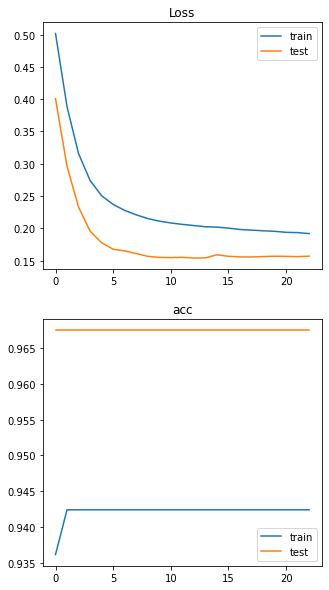

In [ ]:
plot_history(history, metric='acc')

In [ ]:
nn_preds = model.predict(X_test_eda)

In [ ]:
nn_preds_r = nn_preds.round()

In [ ]:
print(classification_report(y_test, nn_preds_r))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       208
           1       0.00      0.00      0.00         7

    accuracy                           0.97       215
   macro avg       0.48      0.50      0.49       215
weighted avg       0.94      0.97      0.95       215



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


After thorough examination, it seems that the neural network isn't able to predict the positive class either. I'll try LGBM again with Citology as the new target.

In [ ]:
lgb_pipe.get_params()

{'lgbmclassifier': LGBMClassifier(),
 'lgbmclassifier__boosting_type': 'gbdt',
 'lgbmclassifier__class_weight': None,
 'lgbmclassifier__colsample_bytree': 1.0,
 'lgbmclassifier__importance_type': 'split',
 'lgbmclassifier__learning_rate': 0.1,
 'lgbmclassifier__max_depth': -1,
 'lgbmclassifier__min_child_samples': 20,
 'lgbmclassifier__min_child_weight': 0.001,
 'lgbmclassifier__min_split_gain': 0.0,
 'lgbmclassifier__n_estimators': 100,
 'lgbmclassifier__n_jobs': -1,
 'lgbmclassifier__num_leaves': 31,
 'lgbmclassifier__objective': None,
 'lgbmclassifier__random_state': None,
 'lgbmclassifier__reg_alpha': 0.0,
 'lgbmclassifier__reg_lambda': 0.0,
 'lgbmclassifier__silent': True,
 'lgbmclassifier__subsample': 1.0,
 'lgbmclassifier__subsample_for_bin': 200000,
 'lgbmclassifier__subsample_freq': 0,
 'memory': None,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler', Standard

In [ ]:
lgb_params = {'lgbmclassifier__learning_rate':[0.01,0.05,0.1,0.15,0.2,0.3],
              'lgbmclassifier__max_depth':[-1,0,1,2,3,5,8],
              'lgbmclassifier__min_child_samples':[3,5,10,15,20,30],
              'lgbmclassifier__n_estimators':[100,200,300]}

In [ ]:
lgb_grid = GridSearchCV(lgb_pipe,lgb_params)

In [ ]:
lgb_grid.fit(X_train_eda,y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lgbmclassifier', LGBMClassifier())]),
             param_grid={'lgbmclassifier__learning_rate': [0.01, 0.05, 0.1,
                                                           0.15, 0.2, 0.3],
                         'lgbmclassifier__max_depth': [-1, 0, 1, 2, 3, 5, 8],
                         'lgbmclassifier__min_child_samples': [3, 5, 10, 15, 20,
                                                               30],
                         'lgbmclassifier__n_estimators': [100, 200, 300]})

In [ ]:
print(lgb_grid.best_params_)

{'lgbmclassifier__learning_rate': 0.01, 'lgbmclassifier__max_depth': -1, 'lgbmclassifier__min_child_samples': 10, 'lgbmclassifier__n_estimators': 100}


In [ ]:
best_lgb = LGBMClassifier(learning_rate=.01,
                          min_child_samples=10,
                          n_estimators=100)

In [ ]:
best_lgb_pipe = make_pipeline(scaler,best_lgb)

In [ ]:
best_lgb_pipe.fit(X_train_eda,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lgbmclassifier',
                 LGBMClassifier(learning_rate=0.01, min_child_samples=10))])

In [ ]:
best_lgb_preds = best_lgb_pipe.predict(X_test_eda)

In [ ]:
print(classification_report(y_test,best_lgb_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       208
           1       0.00      0.00      0.00         7

    accuracy                           0.97       215
   macro avg       0.48      0.50      0.49       215
weighted avg       0.94      0.97      0.95       215



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It seems the grid search is not helping my model to find the positive class in the Citology target column, I'll try one more simpler model and then try the other target columns.

In [ ]:
rf_pipe.get_params()

{'memory': None,
 'randomforestclassifier': RandomForestClassifier(),
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__n_jobs': None,
 'randomforestclassifier__oob_score': False,
 'randomforestclassifier__random_state': None,
 'randomforestclassifier__verbose': 0,
 'randomforestclassifier__warm_start': False,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__wi

In [ ]:
rf_params = {'randomforestclassifier__max_depth':[1,2,3,5,10,20],
             'randomforestclassifier__min_samples_leaf':[1,3,5,10,15],
             'randomforestclassifier__min_samples_split':[2,3,4,7,10],
             'randomforestclassifier__n_estimators':[100,200,300,500],
             'randomforestclassifier__max_leaf_nodes':[25,50,200,500]}

In [ ]:
rf_grid = GridSearchCV(rf_pipe,rf_params)

In [ ]:
rf_grid.fit(X_train_eda,y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [1, 2, 3, 5, 10,
                                                               20],
                         'randomforestclassifier__max_leaf_nodes': [25, 50, 200,
                                                                    500],
                         'randomforestclassifier__min_samples_leaf': [1, 3, 5,
                                                                      10, 15],
                         'randomforestclassifier__min_samples_split': [2, 3, 4,
                                                                       7, 10],
                         'randomforestclassifier__n_estimators': [100, 200, 300,
                                                                  500]})

In [ ]:
print(rf_grid.best_params_)

{'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_leaf_nodes': 50, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 100}


In [ ]:
best_rf = RandomForestClassifier(max_depth=20, max_leaf_nodes=50, min_samples_split=2, n_estimators=100)

In [ ]:
best_rf_pipe = make_pipeline(scaler,best_rf)

In [ ]:
best_rf_pipe.fit(X_train_eda,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=20, max_leaf_nodes=50))])

In [ ]:
best_rf_preds = best_rf_pipe.predict(X_test_eda)

In [ ]:
print(classification_report(y_test,best_rf_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       208
           1       0.00      0.00      0.00         7

    accuracy                           0.97       215
   macro avg       0.48      0.50      0.49       215
weighted avg       0.94      0.97      0.95       215



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Even with grid search hyperparameter tuning, no model was able to detect positives in the Citology class. I'll continue examining the other targets: the Hinselman test and the Schiller test.

In [ ]:
best_rf2 = RandomForestClassifier(min_samples_leaf=1,n_estimators=500)

In [ ]:
best_rf_pipe2 = make_pipeline(scaler, best_rf2)

In [ ]:
best_rf_pipe2.fit(X_train_eda,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=500))])

In [ ]:
best_rf2_preds = best_rf_pipe2.predict(X_test_eda)

In [ ]:
print(classification_report(y_test, best_rf2_preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       208
           1       0.00      0.00      0.00         7

    accuracy                           0.96       215
   macro avg       0.48      0.50      0.49       215
weighted avg       0.94      0.96      0.95       215



Seeing if some feature engineering helps at all

In [ ]:
pca = PCA()

In [ ]:
X_train_eda_scaled = scaler.fit_transform(X_train_eda)

In [ ]:
pca.fit(X_train_eda_scaled)

PCA()

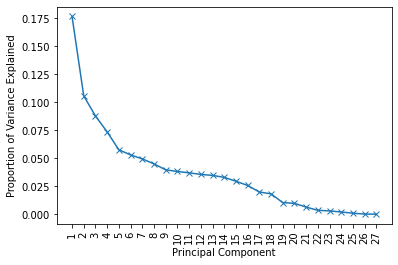

In [ ]:
plt.plot(range(1,28), pca.explained_variance_ratio_[:27], marker='x')
plt.xticks(ticks = range(1,28), rotation=90)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained');

In [ ]:
#it looks like there might be a few good options for how many principle components to include
#I will start with 5 and go up from there if 5 features does not seem to be enough

In [ ]:
X_test_eda_scaled = scaler.fit_transform(X_test_eda)

In [ ]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_eda_scaled)
X_test_pca = pca.fit_transform(X_test_eda_scaled)

In [ ]:
best_rf.fit(X_train_pca,y_train)

RandomForestClassifier()

In [ ]:
best_rf2_preds_pca = best_rf.predict(X_test_pca)

In [ ]:
print(classification_report(y_test, best_rf2_preds_pca))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       208
           1       0.00      0.00      0.00         7

    accuracy                           0.97       215
   macro avg       0.48      0.50      0.49       215
weighted avg       0.94      0.97      0.95       215



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Looks like using 5 features did not improve F1 score.